<a href="https://colab.research.google.com/github/prajakta1011/Gen-Ai-/blob/main/fRUIT_CNN_Train_Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pathlib
import tensorflow as tf  #Deep learning lib by google ,
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras  #Keras inside the tensorflow, keras is also deep le Lib
from tensorflow.keras import layers     #layer is class
from tensorflow.keras.models import Sequential  #we can add layes one by one

In [ ]:
DataPath = '/content/drive/MyDrive/FruitClassification/original_data_set'
print("DataPath",DataPath)

DataPath /content/drive/MyDrive/FruitClassification/original_data_set


In [ ]:
# import image module from pillow
from PIL import Image
import csv
import numpy

In [ ]:
classList=[]
for filename in os.listdir(DataPath):
  # print(filename)
  classList.append(filename)
print(classList)

['freshoranges', 'freshbanana', 'freshapples', 'rottenoranges', 'rottenbanana', 'rottenapples']


In [ ]:
len(classList)

6

In [ ]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/FruitClassification/original_data_set/")

In [ ]:
ImageType='png'

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.png')))
print(image_count_train)

1511


In [ ]:
batch_size = 32
img_height = 56   #256
img_width = 56     #256

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123, #random
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 1512 files belonging to 6 classes.
Using 1210 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 1512 files belonging to 6 classes.
Using 302 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names  # number of types of diseases
print(class_names)


['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


In [ ]:
print('classList',class_names)
numpy.savetxt("/content/drive/MyDrive/FruitClassification/Lables.csv",class_names,
           delimiter =", ",
           fmt ='% s')

classList ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


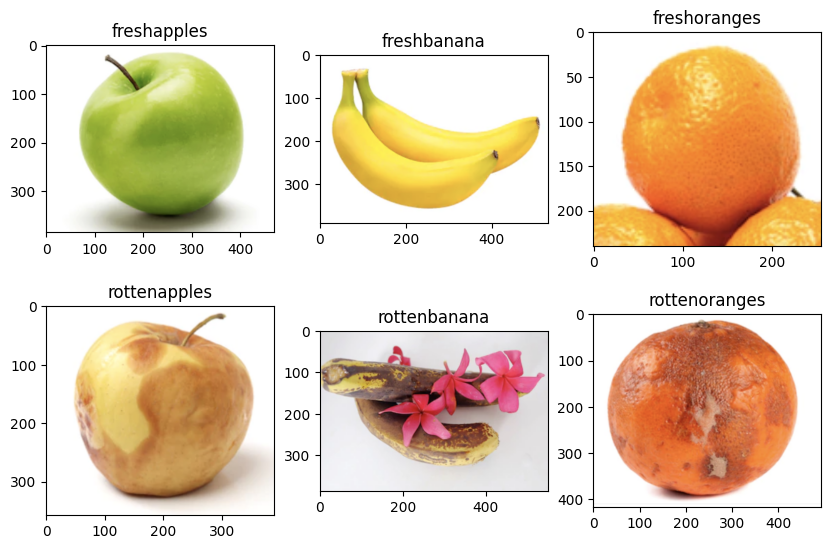

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(len(classList)):
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.png'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE   #builds a performance model of the input pipeline and runs an optimization algorithm to find a good allocation of its CPU budget across all parameters specified as AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
class_len=len(class_names)
print(class_len)

6


In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = class_len
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
]) #preprocessing layer - normalize pixel values
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (img_height, img_width, 32)))
#1st layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
#2nd layer
model.add(MaxPool2D(pool_size=(2,2)))
#3nd layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))#to prevent overfitting


model.add(Flatten())#2d or 3d matrix to one dim mat
model.add(Dense(num_classes, activation = "softmax"))#output layer neuron ##
# Softmax -for classes > 2
# sigmoid - for binary or 2  , dense layer > num_class=1


Compile the model

In [ ]:
from tensorflow.keras.optimizers import RMSprop

As it is a multi class classification, we are using Sparse-CategoricalCrossEntropy as the loss function, and we are using adam optimizer as a hit & trial, further we can perform hyper parameter optimization and change the optimizer accordingly

In [ ]:
# Compiling the model
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
adamax=keras.optimizers.Adamax(learning_rate=0.00085, beta_1=0.9, beta_2=0.999, epsilon=1e-07) #These are just general code. you can find them easily in tensorflow API guide

In [ ]:

model.compile(optimizer=adamax,   #Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),#from_logits=True),
              metrics=['accuracy'])
#adam- optimisation algorithm   or SGD etc.
#

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 56, 56, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)        2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/FruitClassification/Model_AutoSaved.h5"),
]

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks,
  )

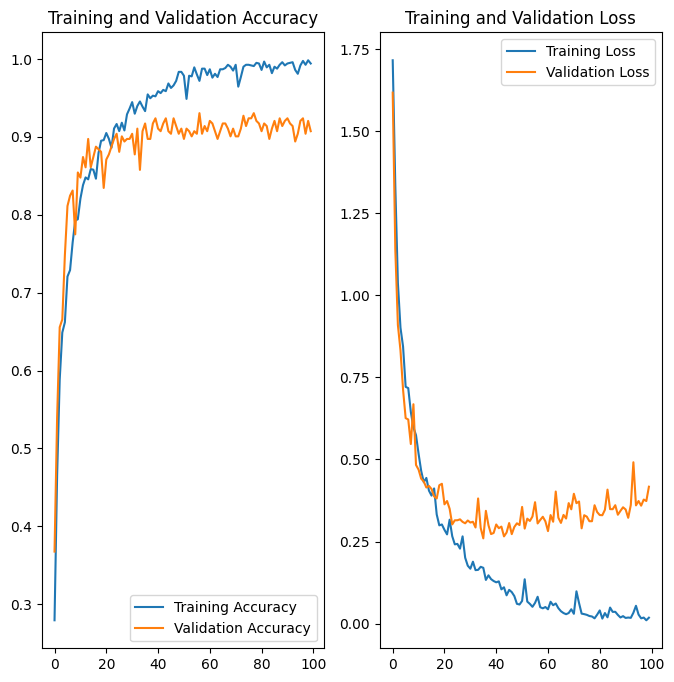

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
%cd /content/drive/MyDrive/FruitClassification/
model_json=model.to_json()
with open("model.json", "w") as json_file:  # architecture of model
    json_file.write(model_json)
# serialize weights to HDF5
    model.save_weights("model.h5")  # trained weight of model
    print("Saved model to disk")

/content/drive/MyDrive/FruitClassification
Saved model to disk


----------------------------------------------
Inference Code To Test Model
-----------------------------------------------


In [ ]:
from tensorflow.keras.models import model_from_json
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
json_file = open('/content/drive/MyDrive/FruitClassification/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/FruitClassification/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
file = open("/content/drive/MyDrive/FruitClassification/Lables.csv", "r")
csv_reader = csv.reader(file)
label = []

for row in csv_reader:
    # row=row.replace
    row=str(row)

    row=row.replace('[', '')
    row=row.replace(']', '')
    row=row.replace("'", '')

    label.append(row)
print(label)
print('------------')




['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
------------


In [ ]:
from tensorflow.keras.preprocessing import image
imgpath='/content/drive/MyDrive/FruitClassification/original_data_set/freshbanana/Screen Shot 2018-06-12 at 10.00.00 PM.png'

# test_image = image.load_img(imgpath, target_size = (256, 256))
test_image = image.load_img(imgpath, target_size = (56, 56))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

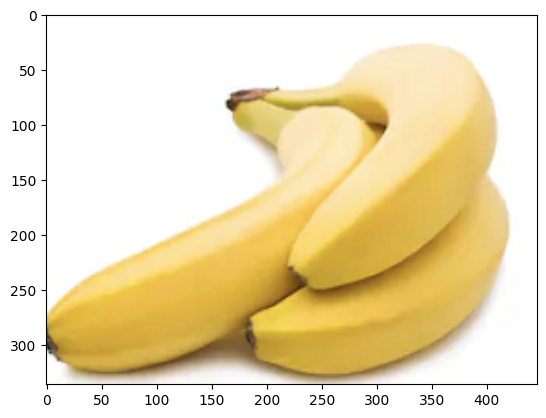

In [ ]:
image =Image.open(imgpath)
plt.imshow(image)

In [ ]:
result = loaded_model.predict(test_image)
result

1/1 [==============================] - 0s 266ms/step


array([[4.8607940e-10, 9.9939704e-01, 5.4552597e-08, 4.3102641e-09,
        2.5374202e-06, 6.0040754e-04]], dtype=float32)

In [ ]:

OutPutClass=label[result.argmax()]
print(OutPutClass)

freshbanana
